In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/BrainTumor'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import os
import cv2
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing import image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import itertools

In [ ]:
# Load data
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [ ]:
# Load training data
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

In [ ]:
# Load testing data
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

In [ ]:
# Convert lists to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
# Data Overview
print("Total number of images:", len(X_train))
print("Shape of images array:", X_train.shape)
print("Number of unique classes:", len(np.unique(Y_train)))

Total number of images: 3284
Shape of images array: (3284, 150, 150, 3)
Number of unique classes: 4


In [ ]:
from collections import Counter

# Count the occurrences of each unique class label
class_counts = Counter(Y_train)

# Print the class counts
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} occurrences")

Class glioma_tumor: 936 occurrences
Class meningioma_tumor: 947 occurrences
Class no_tumor: 500 occurrences
Class pituitary_tumor: 901 occurrences


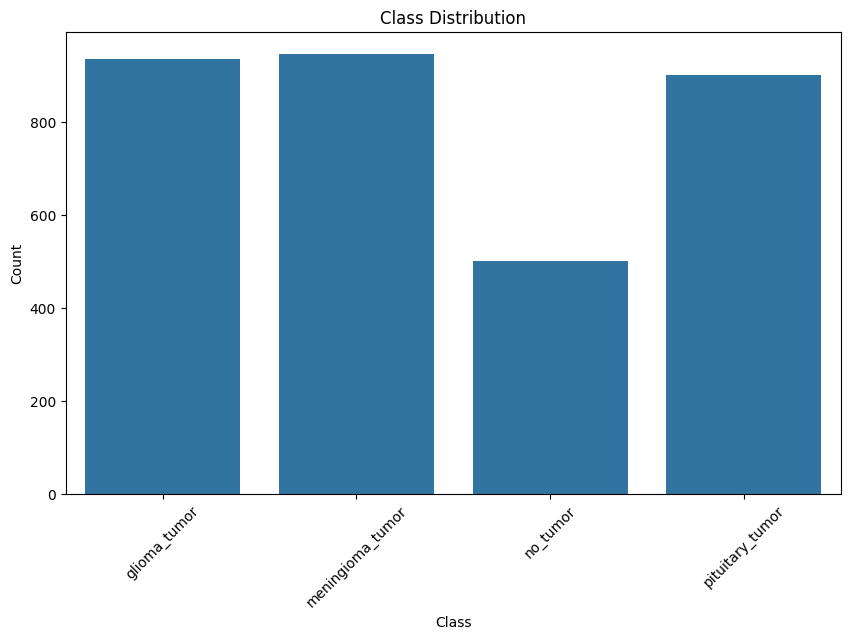

In [ ]:
# Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=Y_train)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Shuffle data
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=101)

In [ ]:
# Convert labels to categorical
y_train_new = [labels.index(i) for i in y_train]
y_train = tf.keras.utils.to_categorical(y_train_new)

y_test_new = [labels.index(i) for i in y_test]
y_test = tf.keras.utils.to_categorical(y_test_new)

In [ ]:
# Define the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

# Define the model
model = Sequential()
model.add(Input(shape=(150, 150, 3)))  # Use Input layer to define input shape
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import Callback

class StopAtAccuracy(Callback):
    def __init__(self, target_accuracy):
        super().__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= self.target_accuracy:
            print(f"\nReached {self.target_accuracy * 100:.2f}% accuracy. Stopping training!")
            self.model.stop_training = True

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.1,
    callbacks=[StopAtAccuracy(target_accuracy=0.95)]  # Stop when 95% accuracy is reached
)


Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.2786 - loss: 2.1745 - val_accuracy: 0.2776 - val_loss: 1.3528
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.3341 - loss: 1.3451 - val_accuracy: 0.4829 - val_loss: 1.1768
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.4797 - loss: 1.1774 - val_accuracy: 0.5817 - val_loss: 1.0351
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.5489 - loss: 1.0306 - val_accuracy: 0.5817 - val_loss: 0.9876
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.6160 - loss: 0.8916 - val_accuracy: 0.6730 - val_loss: 0.8355
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.6597 - loss: 0.8180 - val_accuracy: 0.5856 - val_loss: 0.8578
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.7051 - loss: 0.7309 - val_accuracy: 0.6426 - val_loss: 0.7725
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.7248 - loss: 0.6763 - val_accuracy: 0.642

In [ ]:
# Save the model after training
model.save('main_brain_tumor_model2.h5')
print("Model saved successfully!")


Model saved successfully!


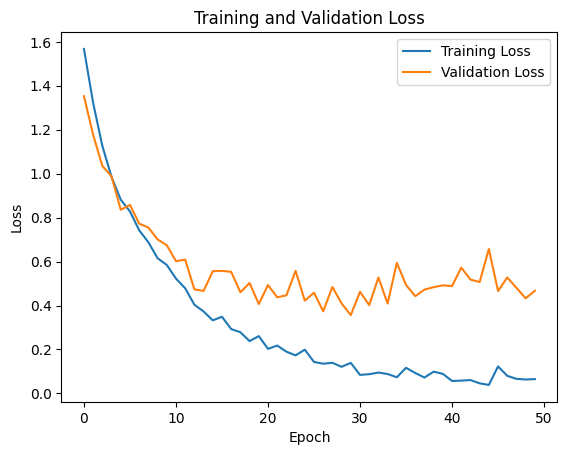

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


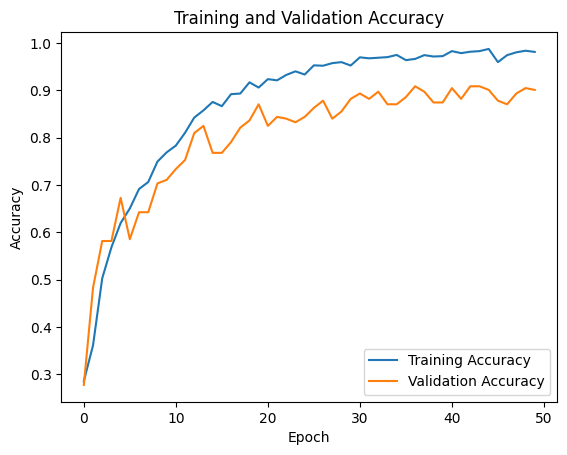

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Predictions for training data
train_probabilities = model.predict(X_train)
train_predictions = np.argmax(train_probabilities, axis=1)

# Predictions for testing data
test_probabilities = model.predict(X_test)
test_predictions = np.argmax(test_probabilities, axis=1)

# Metrics for training data
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), train_predictions)
train_precision = precision_score(np.argmax(y_train, axis=1), train_predictions, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), train_predictions, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), train_predictions, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)

# Metrics for testing data
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), test_predictions)
test_precision = precision_score(np.argmax(y_test, axis=1), test_predictions, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), test_predictions, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), test_predictions, average='weighted')

print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)


83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Training Accuracy: 0.9893414541301865
Training Precision: 0.9893411568632167
Training Recall: 0.9893414541301865
Training F1 Score: 0.9893386037781144
Testing Accuracy: 0.9162861491628614
Testing Precision: 0.916890970899732
Testing Recall: 0.9162861491628614
Testing F1 Score: 0.9159255518518483


In [ ]:
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
# Confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

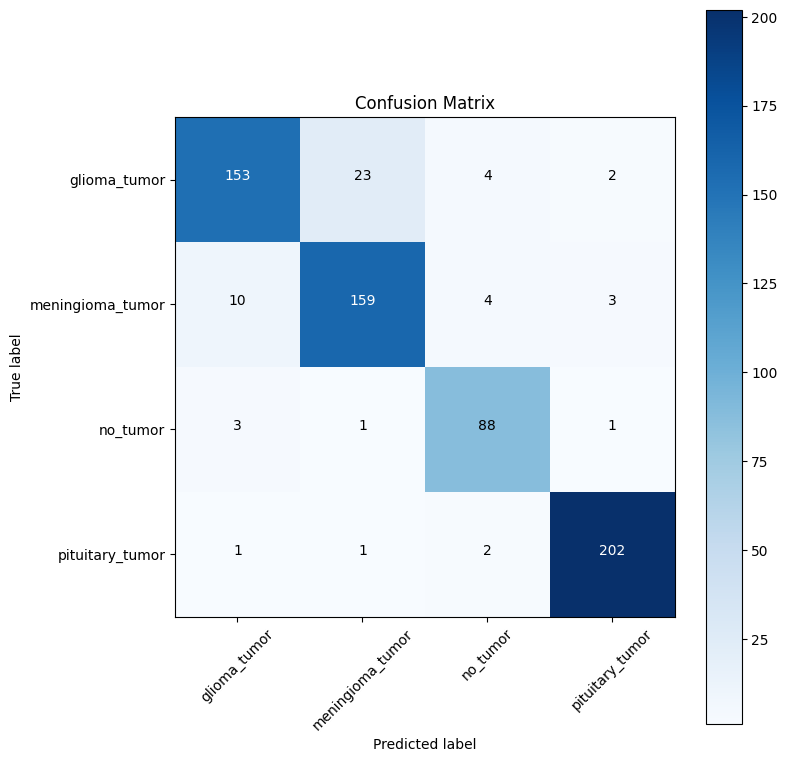

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Predict input image
img = cv2.imread('/content/drive/MyDrive/dataset/Training/glioma_tumor/gg (100).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)

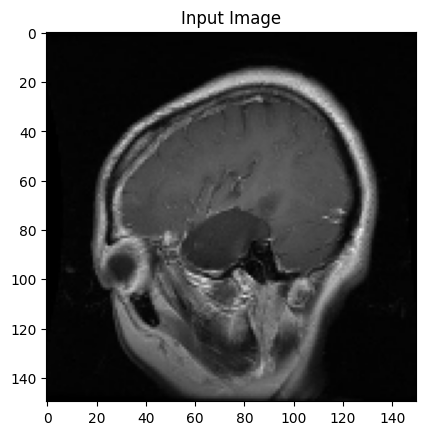

In [ ]:
# Display input image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.show()

In [ ]:
# Predict class of input image
predicted_class = model.predict(img_array)[0]
predicted_label = labels[np.argmax(predicted_class)]
accuracy = np.max(model.predict(img_array)) * 100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
print(f"The predicted class of the input image is: {predicted_label}")
print(f"The accuracy of prediction is: {accuracy:.2f}%")

The predicted class of the input image is: glioma_tumor
The accuracy of prediction is: 87.15%
